<a href="https://colab.research.google.com/github/GodishalaAshwith/MLAssignment1_179/blob/main/MLExternal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Internal 2

1. Write a program that demonstrates the advantage of ensemble learning compared to a single classifier.
Apply a Decision Tree and a Random Forest (RF) classifier on a given dataset.
Compare their performance using evaluation metrics such as accuracy, precision, recall, and F1-score.
Explore the effect of changing the number of estimators (decision trees) in Random Forest.  


In [ ]:
#Dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples=1000,n_features=200,random_state=42)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)


#Model Training & Prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier(random_state=42).fit(x_train,y_train)
rf = RandomForestClassifier(random_state=42).fit(x_train,y_train)

y_dt_pred = dt.predict(x_test)
y_rf_pred = rf.predict(x_test)


#Accuracy, Precision, Recall, F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print("Accuracy Scores:")
print("DT ",accuracy_score(y_test,y_dt_pred)*100)
print("RF ",accuracy_score(y_test,y_rf_pred)*100)
print()

print("Precision Scores:")
print("DT ",precision_score(y_test,y_dt_pred)*100)
print("RF ",precision_score(y_test,y_rf_pred)*100)
print()

print("Recall Scores:")
print("DT ",recall_score(y_test,y_dt_pred)*100)
print("RF ",recall_score(y_test,y_rf_pred)*100)
print()

print("F1 Scores:")
print("DT ",f1_score(y_test,y_dt_pred)*100)
print("RF ",f1_score(y_test,y_rf_pred)*100)
print()

#Effect of Changing Estimators

estimators = [10, 50, 100, 200]
for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    print(f"RF ({n} trees) Accuracy:",
          accuracy_score(y_test, y_pred))

Accuracy Scores:
DT  88.66666666666667
RF  83.0

Precision Scores:
DT  92.36111111111111
RF  86.7132867132867

Recall Scores:
DT  85.25641025641025
RF  79.48717948717949

F1 Scores:
DT  88.66666666666667
RF  82.94314381270902

RF (10 trees) Accuracy: 0.79
RF (50 trees) Accuracy: 0.8266666666666667
RF (100 trees) Accuracy: 0.83
RF (200 trees) Accuracy: 0.8333333333333334


2. Write a program that demonstrates the use of simple ensemble techniques: Max Voting, Average Voting, and Weighted Average Voting (assign weights based on each model’s performance).

In [ ]:
# Dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

dt = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)
lr = LogisticRegression(max_iter=1000).fit(x_train, y_train)
nb = GaussianNB().fit(x_train, y_train)


# Predictions
dt_pred = dt.predict(x_test)
lr_pred = lr.predict(x_test)
nb_pred = nb.predict(x_test)

dt_acc = accuracy_score(y_test, dt_pred)
lr_acc = accuracy_score(y_test, lr_pred)
nb_acc = accuracy_score(y_test, nb_pred)

dt_prob = dt.predict_proba(x_test)
lr_prob = lr.predict_proba(x_test)
nb_prob = nb.predict_proba(x_test)

# Max Voting
import numpy as np
from scipy.stats import mode

predictions = np.vstack((dt_pred,lr_pred,nb_pred))
max_voting_pred, _ = mode(predictions,axis=0)

print("Max Voting Accuracy:",accuracy_score(y_test, max_voting_pred))
print()

# Avg Voting
avg_prob = (dt_prob + lr_prob + nb_prob) / 3
avg_voting_pred = np.argmax(avg_prob, axis=1)

print("Average Voting Accuracy:",accuracy_score(y_test, avg_voting_pred))
print()

# Weighted Avg Voting
weights = np.array([dt_acc, lr_acc, nb_acc])
weights = weights / weights.sum()   # Normalize weights

weighted_prob = (
    weights[0] * dt_prob +
    weights[1] * lr_prob +
    weights[2] * nb_prob
)

weighted_voting_pred = np.argmax(weighted_prob, axis=1)

print("Weighted Average Voting Accuracy:",accuracy_score(y_test, weighted_voting_pred))


Max Voting Accuracy: 0.8533333333333334

Average Voting Accuracy: 0.84

Weighted Average Voting Accuracy: 0.85


3.Write a program to show the difference between Hard Voting and Soft Voting classifiers in ensemble learning using multiple base learners (e.g., Decision Tree, Logistic Regression, and KNN).

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples=1000,n_features=20,n_informative=15,random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

lr,dt,kn = LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier()

from sklearn.ensemble import VotingClassifier

hard_clf = VotingClassifier(voting = "hard", estimators=[('lr',lr),('dt',dt),('knn',kn)]).fit(x_train,y_train)

soft_clf = VotingClassifier(voting = "soft", estimators=[('lr',lr),('dt',dt),('knn',kn)]).fit(x_train,y_train)

from sklearn.metrics import accuracy_score
print("Accuracy Scores")

print("Hard Voting",accuracy_score(y_test,hard_clf.predict(x_test)))
print("Soft Voting",accuracy_score(y_test,soft_clf.predict(x_test)))

Accuracy Scores
Hard Voting 0.92
Soft Voting 0.9


4. Write a program using the RandomForestRegressor model to make predictions on a suitable regression dataset.
Enable and observe the oob_score (Out-of-Bag score) parameter.
Interpret the results and explain its significance.


In [ ]:
# Load data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X,y = make_regression(n_samples = 1000,n_features=20,random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf_reg = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42).fit(x_train, y_train)

# The OOB score is an R^2 score calculated on unseen data during training
print(f"Out-of-Bag (OOB) Score: {rf_reg.oob_score_:.4f}")
print(f"R2 Score: {r2_score(y_test,rf_reg.predict(x_test)):.4f}")


Out-of-Bag (OOB) Score: 0.7582
R2 Score: 0.7715


5. Write a program to explore different Boosting techniques using suitable datasets:
Adaptive Boosting (AdaBoost) – binary classification.


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples=1000,n_features=20,n_informative=15,random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42).fit(x_train, y_train)

print(f"AdaBoost Accuracy: {ada_clf.score(x_test, y_test):.4f}")

AdaBoost Accuracy: 0.8367


6. Implement K- means algorithm to find the clusters. (also demonstrate with elbow method)

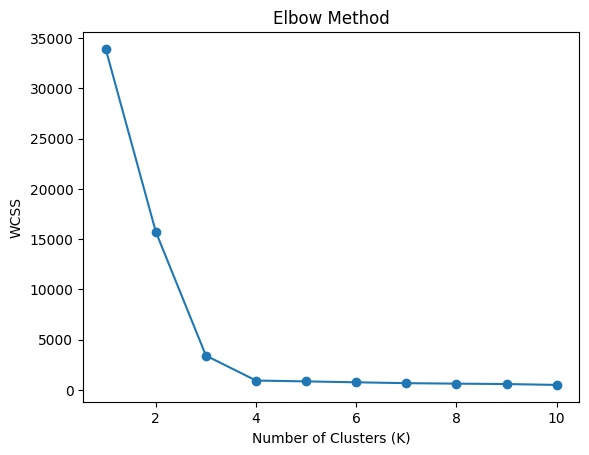

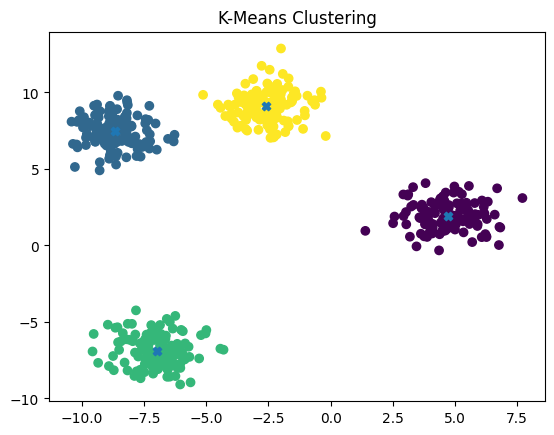

In [ ]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=500, centers=4, random_state=42)


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker='X'
)
plt.title("K-Means Clustering")
plt.show()



7. Implement all the clustering distance measures (similarity measures)
* Euclidean distance
* Manhattan distance
* cosine similarity
* minkowski
* jaccard index

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean, cityblock, minkowski, jaccard
from sklearn.metrics.pairwise import cosine_similarity

vec_a = np.array([1, 2, 3, 4])
vec_b = np.array([5, 6, 7, 8])
set_a = np.array([1, 1, 0, 1, 0, 0])
set_b = np.array([1, 0, 1, 1, 0, 1])

print(f"Euclidean: {euclidean(vec_a, vec_b):.4f}")
print(f"Manhattan: {cityblock(vec_a, vec_b):.4f}")
print(f"Minkowski (p=4): {minkowski(vec_a, vec_b, p=4):.4f}")
print(f"Cosine Similarity: {cosine_similarity([vec_a], [vec_b])[0][0]:.4f}")
print(f"Jaccard Distance: {jaccard(set_a, set_b):.4f}")

Euclidean: 8.0000
Manhattan: 16.0000
Minkowski (p=4): 5.6569
Cosine Similarity: 0.9689
Jaccard Distance: 0.6000


8. Implement hierarchical clustering : agglomerative (BIRCH and CHAMELEON)

In [ ]:
from sklearn.cluster import Birch, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

X_blob, _ = make_blobs(n_samples=500, centers=4, random_state=42)

# BIRCH (good for large datasets)
birch = Birch(n_clusters=4).fit(X_blob)
print(f"BIRCH Silhouette Score: {silhouette_score(X_blob, birch.labels_):.4f}")

# Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters=4).fit(X_blob)
print(f"Agglomerative Silhouette Score: {silhouette_score(X_blob, agglom.labels_):.4f}")

BIRCH Silhouette Score: 0.7911
Agglomerative Silhouette Score: 0.7911


 9.  Implement Types of Linkages
*   Single Linkage
*   Complete Linkage
*   Average Linkage
*   Ward's Linkage
*   Centroid-Linkage











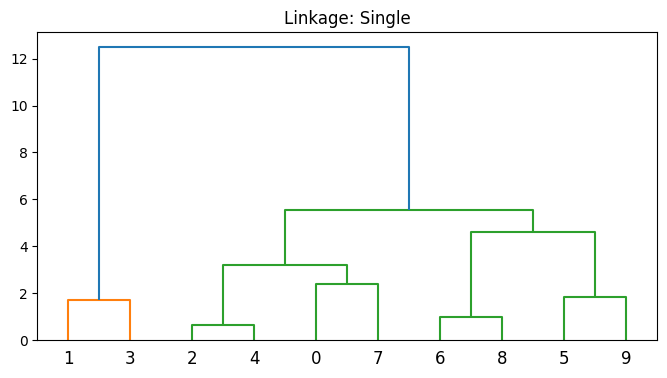

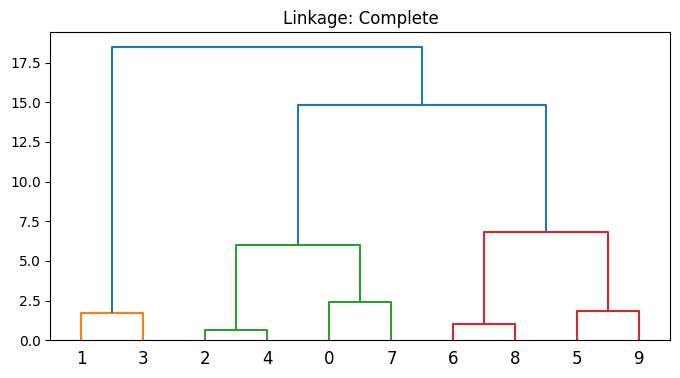

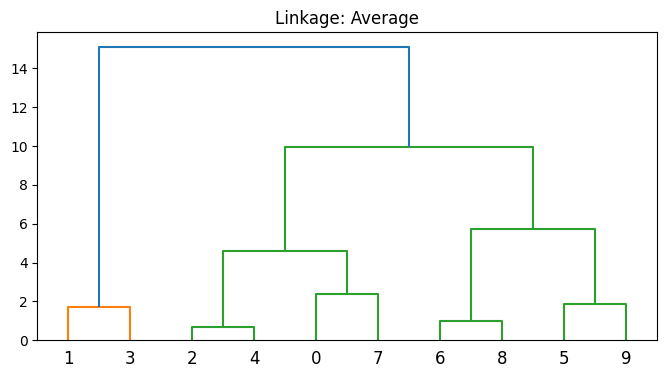

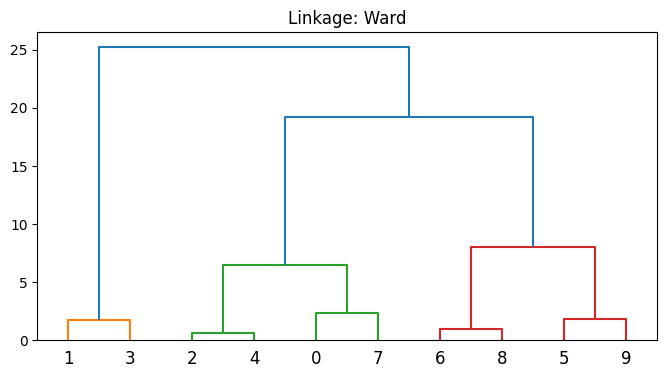

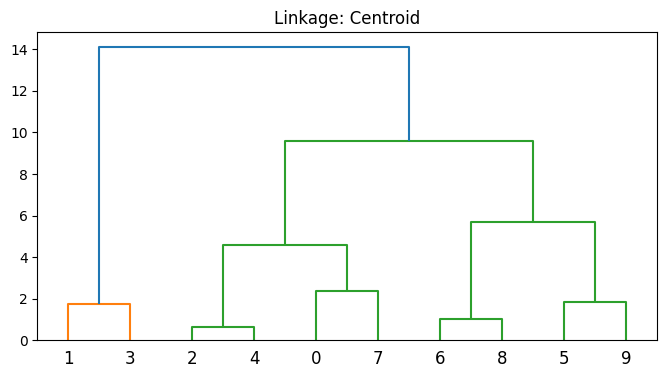

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=10, centers = 5, random_state=42)

# Loop through methods and plot dendrograms
for method in ['single', 'complete', 'average', 'ward', 'centroid']:
    Z = linkage(X, method=method)

    plt.figure(figsize=(8, 4))
    dendrogram(Z)
    plt.title(f"Linkage: {method.capitalize()}")
    plt.show()

10. Implement DBSCAN clustering

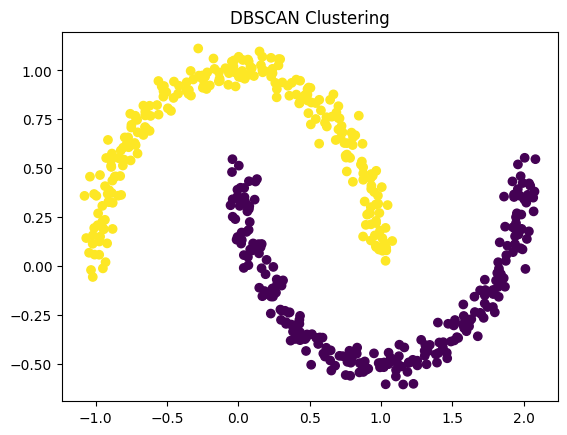

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=500, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.3, min_samples=5).fit(X)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("DBSCAN Clustering")
plt.show()


11.  Implement Spectral Clustering

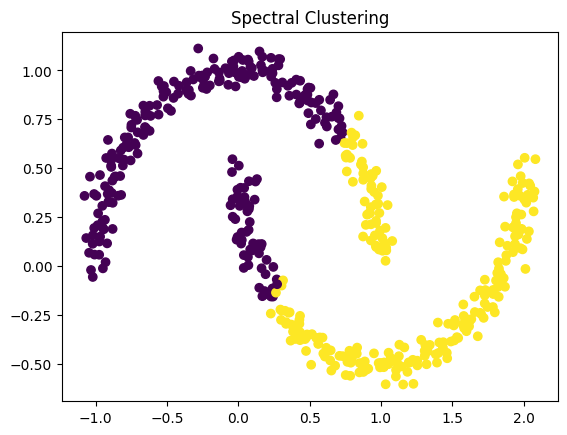

In [ ]:
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=500, noise= 0.05, random_state=42)


from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

spectral = SpectralClustering(n_clusters = 2, random_state=42).fit(X)
labels = spectral.fit_predict(X)

plt.scatter(X[:,0], X[:, 1], c = labels)
plt.title("Spectral Clustering")
plt.show()


12. Perceptron with activation Function with AND, OR (linear data), XOR (non linear data)

In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

# Data for AND, OR, XOR gates
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
y_or  = np.array([0, 1, 1, 1])
y_xor = np.array([0, 1, 1, 0])

# A simple Perceptron can solve linear problems
p = Perceptron()
print(f"AND Gate Accuracy: {p.fit(X, y_and).score(X, y_and) * 100}%")
print(f"OR Gate Accuracy:  {p.fit(X, y_or).score(X, y_or) * 100}%")
print(f"XOR Gate Accuracy (Perceptron): {p.fit(X, y_xor).score(X, y_xor) * 100}%")

# An MLP (Multi-Layer Perceptron) can solve XOR
mlp = MLPClassifier(hidden_layer_sizes=(4,), activation='relu', max_iter=1000, random_state=1)
print(f"XOR Gate Accuracy (MLP): {mlp.fit(X, y_xor).score(X, y_xor) * 100}%")

AND Gate Accuracy: 100.0%
OR Gate Accuracy:  100.0%
XOR Gate Accuracy (Perceptron): 50.0%
XOR Gate Accuracy (MLP): 100.0%


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


13.  MLP with single hidden Layer (with various number of neurons)

In [ ]:
import numpy as np

def sigmoid(x):
  return 1/(1+ np.exp(-x))

class Layer:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size)
        self.bias = np.zeros(output_size)

    def forward(self, inputs):
        return sigmoid(np.dot(inputs, self.weights) + self.bias)

class MLP:
    def __init__(self, hidden_neurons):
        self.hidden = Layer(2, hidden_neurons)
        self.output = Layer(hidden_neurons, 1)

    def feedforward(self, x):
        h_out = self.hidden.forward(x)
        o_out = self.output.forward(h_out)
        return o_out

x = np.array([2, 3])

for neurons in [1, 2, 4, 8, 20]:
    mlp = MLP(hidden_neurons=neurons)
    output = mlp.feedforward(x)
    print(f"Hidden Neurons: {neurons}, Output: {output[0]}")


Hidden Neurons: 1, Output: 0.42122038806597023
Hidden Neurons: 2, Output: 0.8743083447303814
Hidden Neurons: 4, Output: 0.39237322473613945
Hidden Neurons: 8, Output: 0.2811176415861861
Hidden Neurons: 20, Output: 0.04805327725381914


14. MLP on MNIST dataset and display its train and test data score.

In [ ]:
from sklearn.datasets import fetch_openml

print("Loading MNIST data...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X, y = X[:5000] / 255.0, y[:5000]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=42)
mlp.fit(X_train, y_train)

print(f"MNIST Train Accuracy: {mlp.score(X_train, y_train):.4f}")
print(f"MNIST Test Accuracy:  {mlp.score(X_test, y_test):.4f}")

Loading MNIST data...
MNIST Train Accuracy: 1.0000
MNIST Test Accuracy:  0.9227


15. Simple Perceptron (basic code) with step function and the role of bias and weights

In [ ]:
import numpy as np

def step_function(x):
    # Step activation: returns 1 if x >= 0, else 0
    return 1 if x>=0 else 0

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        return step_function(np.dot(self.weights, inputs) + self.bias)

# Example weights and bias
weights = np.array([0, 1])  # w1 = 0, w2 = 1
bias = 4                    # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])        # x1 = 2, x2 = 3
print(n.feedforward(x))


1


16. Simple Perceptron (basic code) with sigmoid function with an example data.

In [ ]:
import numpy as np

def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    return sigmoid(np.dot(self.weights, inputs) + self.bias)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))


0.9990889488055994


In [ ]:
import kagglehub
path = kagglehub.dataset_download("camnugent/california-housing-prices")

Using Colab cache for faster access to the 'california-housing-prices' dataset.


# Internal 1

2. Wrapper Methods:
  * 2.1. Forward Selection - Add one feature at a time recursively
  * 2.2. Backward Selection - Remove one feature at a time recursively
  * 2.3. Exhaustive Search - Search across all possible feature combinations
  * 2.4. Recursive Feature Elimination (RFE) - Ranking, Iterative Removal, Stopping Criterion


In [28]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

#SFS
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)

forward_sel = SequentialFeatureSelector(
    model, n_features_to_select=5, direction="forward",n_jobs=-1
)
forward_sel.fit(X, y)

print("Forward Selection Features:",
      list(X.columns[forward_sel.get_support()]))


#SBS
backward_sel = SequentialFeatureSelector(
    model, n_features_to_select=5, direction="backward",n_jobs=-1
)
backward_sel.fit(X, y)

print("Backward Selection Features:",
      list(X.columns[backward_sel.get_support()]))





Forward Selection Features: ['mean radius', 'radius error', 'worst texture', 'worst perimeter', 'worst compactness']
Backward Selection Features: ['mean texture', 'mean perimeter', 'area error', 'worst texture', 'worst concavity']


In [22]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)

efs = ExhaustiveFeatureSelector(
    model,
    min_features=1,
    max_features=5,
    scoring='accuracy',
    cv=3
)

efs.fit(X.iloc[:, :5], y)   # MUST limit features
print("Best Features:", efs.best_feature_names_)


Features: 31/31

Best Features: ('mean radius', 'mean texture', 'mean perimeter', 'mean area')


In [24]:
#RFE
from sklearn.feature_selection import RFE

rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

print("RFE Selected Features:",
      list(X.columns[rfe.support_]))


RFE Selected Features: ['mean radius', 'texture error', 'worst radius', 'worst compactness', 'worst concavity']


3. Embedded Methods:
  * 3.1. L1 Regularization (LASSO)
  * 3.2. L2 Regularization (Ridge)
  * 3.3. L1/L2 Regularization (Elastic Net)
  * 3.4. Other ML Methods: Random Forest Classifier, Decision Tree, SVM


In [15]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


from sklearn.linear_model import LogisticRegression
#Lasso
lasso = LogisticRegression(penalty='l1', solver='liblinear',max_iter=5000)
lasso.fit(X_scaled, y)
lasso_features = X.columns[lasso.coef_[0] != 0]
print("LASSO Selected Features:", list(lasso_features))

#Ridge
ridge = LogisticRegression(penalty='l2',max_iter=5000)
ridge.fit(X_scaled, y)
print("Ridge Coefficients:", ridge.coef_)

#Elastic Net
elastic = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5,
    max_iter=5000
)
elastic.fit(X_scaled, y)
elastic_features = X.columns[elastic.coef_[0] != 0]
print("Elastic Net Selected Features:", list(elastic_features))


LASSO Selected Features: ['mean concavity', 'mean concave points', 'mean fractal dimension', 'radius error', 'texture error', 'smoothness error', 'compactness error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst concavity', 'worst concave points', 'worst symmetry']
Ridge Coefficients: [[-0.37545731 -0.38203064 -0.36097105 -0.43946905 -0.16737642  0.56070701
  -0.85529546 -0.96284928  0.07631246  0.3284581  -1.28926139  0.26511648
  -0.6718954  -0.99886093 -0.27950865  0.74407728  0.1012066  -0.32314492
   0.29504386  0.68174616 -1.02658552 -1.32055634 -0.82039667 -0.99467101
  -0.66571519  0.05114225 -0.88022314 -0.92517516 -0.88871131 -0.48699036]]
Elastic Net Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 

In [9]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
rf_features = X.columns[rf.feature_importances_ > 0.01]
print("RF Important Features:", list(rf_features))

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)
dt_features = X.columns[dt.feature_importances_ > 0]
print("Decision Tree Important Features:", list(dt_features))

#SVM
from sklearn.svm import LinearSVC
svm = LinearSVC(penalty='l1', dual=False, max_iter=5000)
svm.fit(X, y)
svm_features = X.columns[svm.coef_[0] != 0]
print("SVM Selected Features:", list(svm_features))


RF Important Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points']
Decision Tree Important Features: ['mean texture', 'mean smoothness', 'mean compactness', 'mean concave points', 'area error', 'smoothness error', 'concavity error', 'worst radius', 'worst texture', 'worst area', 'worst smoothness', 'worst concavity', 'worst concave points']
SVM Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'texture error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points', 'worst symmetry']


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


4. Write a program that applies the PCA technique to any dataset:
  * 4.a. Standardize the variables in the dataset. Why is this step necessary before performing a PCA?
  * 4.b. Create a scatter plot from the transformed data, with PC1 and PC2 as the axes.
  * 4.c. Which variables are the most important for PC1 and PC2? Why?
  * 4.d. What percentage of the variance in the dataset is explained by PC1 and PC2?
  * 4.e. How many PCs explain more than 80% of the total variance within the dataset?


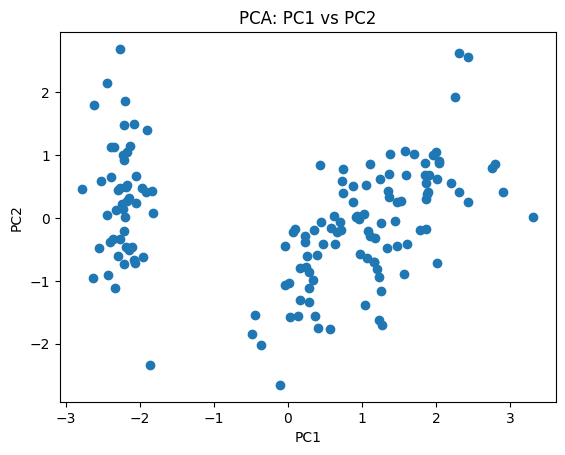

                        PC1       PC2
sepal length (cm)  0.521066  0.377418
sepal width (cm)  -0.269347  0.923296
petal length (cm)  0.580413  0.024492
petal width (cm)   0.564857  0.066942
Variance explained by PC1 and PC2: [72.96244541 22.85076179]
Cumulative Variance: [0.72962445 0.95813207 0.99482129 1.        ]
Number of PCs explaining >80% variance: 2


In [3]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: PC1 vs PC2")
plt.show()


loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=["PC1", "PC2"]
)

print(loadings)


print("Variance explained by PC1 and PC2:",
      pca.explained_variance_ratio_ * 100)

import numpy as np

# Fit PCA with all components
pca_full = PCA()
pca_full.fit(X_scaled)

# Cumulative variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

print("Cumulative Variance:", cumulative_variance)

# Number of PCs explaining >80% variance
num_pcs = np.argmax(cumulative_variance >= 0.80) + 1
print("Number of PCs explaining >80% variance:", num_pcs)



5. Implement Linear Regression on house price prediction. Show how much the dependent variable (y) changes with each unit change in the independent variable (x).
   * Display the intercept and slope values and    * Display the metric values (MSE, MAE, RMSE)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
data = data.drop(columns="ocean_proximity").dropna()

X = data[["median_income"]]          # independent variable (x)
y = data["median_house_value"]       # dependent variable (y)

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE :", mse)
print("MAE :", mae)
print("RMSE:", rmse)


Intercept (b0): 45596.46754083515
Slope (b1): 41690.33611910384
MSE : 6982859996.244634
MAE : 62614.946633465646
RMSE: 83563.50875977286


6. Work on Salary\_Data.csv file (download from Kaggle or UCI) and show how much the dependent variable (salary-y) changes with each unit change in the independent variable (years of experience-x).

In [ ]:
import pandas as pd

data = pd.read_csv("Salary_Data.csv")   # from Kaggle / UCI
X = data[["YearsExperience"]]
y = data["Salary"]


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_[0])


7. Implement Multiple Linear Regression for:
   * Weight Reduction = Function(Age, Height, Weight, TimeOnExercise) and    * House price prediction


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample dataset
data = {
    "Age": [25, 30, 35, 40, 45],
    "Height": [165, 170, 168, 172, 175],
    "Weight": [70, 80, 78, 85, 90],
    "TimeOnExercise": [30, 45, 40, 60, 70],
    "WeightReduction": [2, 4, 3, 6, 8]
}

df = pd.DataFrame(data)

X = df[["Age", "Height", "Weight", "TimeOnExercise"]]
y = df["WeightReduction"]

model = LinearRegression()
model.fit(X, y)

print("Predicted Weight Reduction:", model.predict(X))


Predicted Weight Reduction: [2. 4. 3. 6. 8.]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
data = data.drop(columns="ocean_proximity").dropna()

X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("House Price MSE:", mean_squared_error(y_test, y_pred))


House Price MSE: 4738972791.40049


8. Implement Polynomial Linear Regression for non-linear data (download appropriate dataset from UCI/Kaggle).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
data = data.drop(columns="ocean_proximity").dropna()

X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_poly, y_train)

from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_test_poly)
mse = mean_squared_error(y_test, y_pred)

print("Polynomial Regression MSE:", mse)


Polynomial Regression MSE: 3747022694.539887


9. Evaluate the logistic regression model using all classification metrics and verify manually using formulas with the confusion matrix.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()
X = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Accuracy : 0.9707602339181286
Precision: 0.9724770642201835
Recall   : 0.9814814814814815
F1 Score : 0.9769585253456221

Confusion Matrix:
 [[ 60   3]
 [  2 106]]


In [ ]:
TN, FP, FN, TP = cm.ravel()

accuracy  = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall    = TP / (TP + FN)
f1_score_manual = 2 * precision * recall / (precision + recall)

print("\nManual Calculations:")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1_score_manual)



Manual Calculations:
Accuracy : 0.9707602339181286
Precision: 0.9724770642201835
Recall   : 0.9814814814814815
F1 Score : 0.9769585253456222


10. Apply Gradient Descent for linear regression on a house price prediction dataset with different learning rates and iterations (epochs).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
data.drop(columns="ocean_proximity", inplace=True)

# Train-test split
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Handle missing values
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]
x_test = x_test.dropna()
y_test = y_test.loc[x_test.index]

# Feature scaling (important for GD)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Different learning rates and epochs
learning_rates = [0.1, 0.01, 0.001]
epochs = [500, 1000, 2000]

for lr in learning_rates:
    for ep in epochs:
        sgd = SGDRegressor(
            max_iter=ep,
            eta0=lr,
            learning_rate="constant",
            random_state=42
        ).fit(x_train, y_train)
        y_pred = sgd.predict(x_test)

        rmse = mean_squared_error(y_test, y_pred)
        print(f"LR={lr}, Epochs={ep} → RMSE={rmse:.2f}")


LR=0.1, Epochs=500 → RMSE=11483382414.87
LR=0.1, Epochs=1000 → RMSE=11483382414.87
LR=0.1, Epochs=2000 → RMSE=11483382414.87
LR=0.01, Epochs=500 → RMSE=5218106264.04
LR=0.01, Epochs=1000 → RMSE=5218106264.04
LR=0.01, Epochs=2000 → RMSE=5218106264.04
LR=0.001, Epochs=500 → RMSE=4951101000.23
LR=0.001, Epochs=1000 → RMSE=4951101000.23
LR=0.001, Epochs=2000 → RMSE=4951101000.23


11. Demonstrate the use of Regularization methods (LASSO and RIDGE) on non-linear data and display the coefficient values and MSE to address the overfitting problem.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.random.rand(100, 1)
y = 5 * X**2 + 0.1 * np.random.randn(100, 1)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)


from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

ridge = Ridge(alpha=1.0).fit(x_train, y_train)
lasso = Lasso(alpha=0.01).fit(x_train, y_train)

ridge_pred = ridge.predict(x_test)
lasso_pred = lasso.predict(x_test)

print("Ridge MSE :", mean_squared_error(y_test, ridge_pred))
print("Lasso MSE :", mean_squared_error(y_test, lasso_pred))

print("\nRidge Coefficients:")
print(ridge.coef_)

print("\nLasso Coefficients:")
print(lasso.coef_)


Ridge MSE : 0.0671811745288416
Lasso MSE : 0.008767958109531324

Ridge Coefficients:
[0.         1.85919317 2.68987324]

Lasso Coefficients:
[0.        0.        4.8379559]


12. Implement a Decision Tree on the diabetes dataset and display the tree structure.

0.3300178400000161


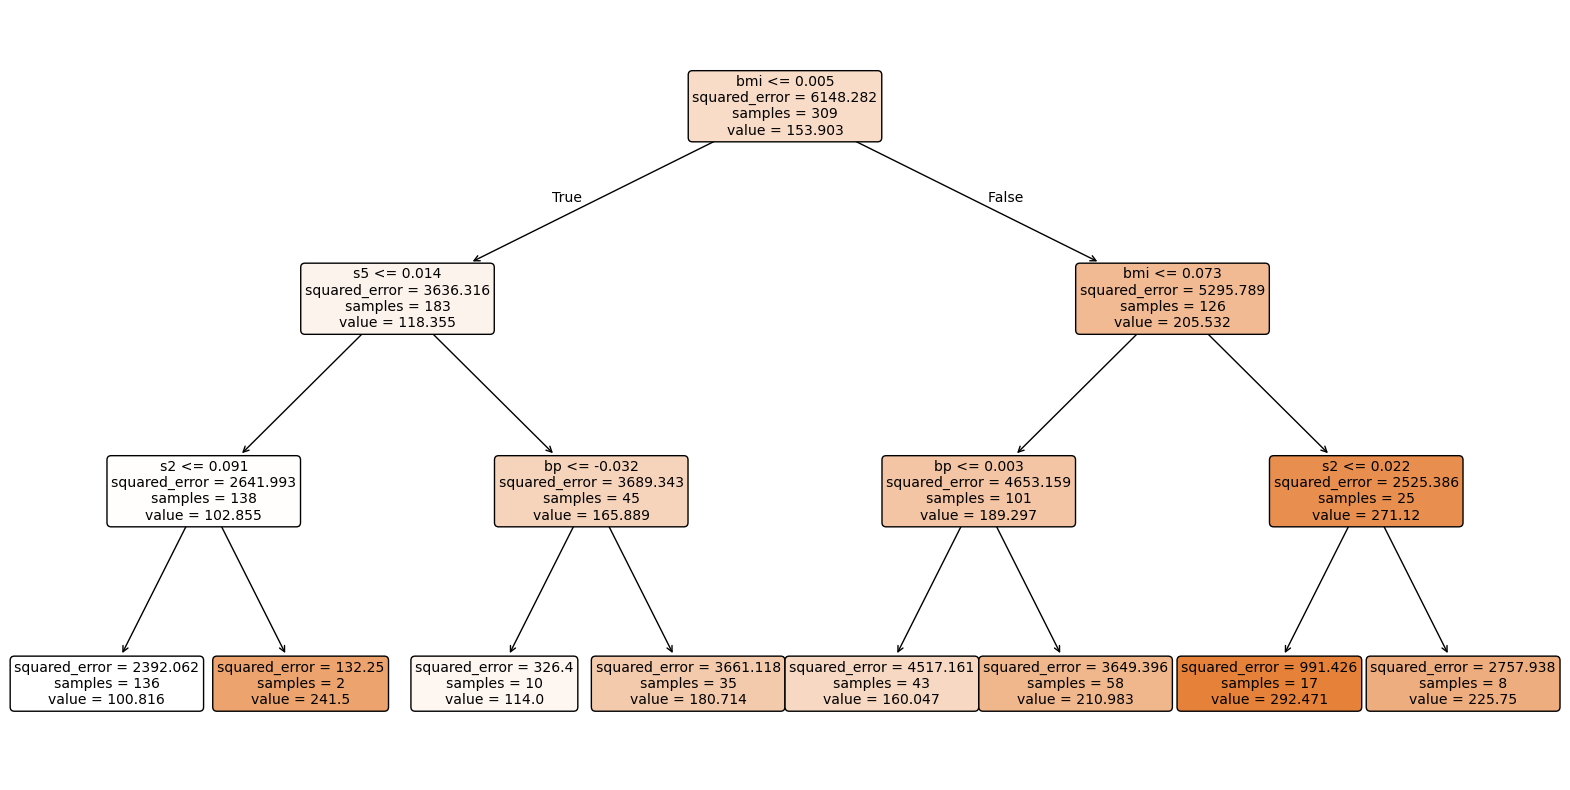

In [ ]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X,y = data.data, data.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 )

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=3, random_state=42).fit(x_train,y_train)
y_pred = dtr.predict(x_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dtr,
    feature_names=data.feature_names,
    filled=True,
    rounded=True
)
plt.show()

13. Implement a simple Naive Bayes model on a loan dataset.

In [ ]:
import pandas as pd

data = {
    "Income": [50000, 30000, 60000, 20000, 80000, 40000, 70000],
    "Credit_Score": [700, 650, 750, 600, 800, 680, 720],
    "Loan_Amount": [200000, 150000, 250000, 100000, 300000, 180000, 220000],
    "Loan_Status": [1, 0, 1, 0, 1, 0, 1]   # 1 = Approved, 0 = Rejected
}

df = pd.DataFrame(data)
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(x_train,y_train)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,nb.predict(x_test)))

14. Implement SVC on the breast cancer dataset.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

ds = load_breast_cancer()
X,y = ds.data, ds.target

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

from sklearn.svm import SVC
svc = SVC().fit(x_train,y_train)


from sklearn.metrics import accuracy_score
y_pred = svc.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9766081871345029


15. Implement KNN on the IRIS dataset.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)


from sklearn.metrics import accuracy_score
y_pred = knn.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))



KNN Accuracy: 1.0
